# Εργασία στο μάθημα Αναγνώριση Προτύπων
# 2ο Παραδοτέο
** *
<font size="4">Χριστίνα Κούτση 9871
Ευσεβεία Νεστοροπούλου 9703</font>

## Part A
***
<font size="5">**Question 1**</font>
<font size="4.5">**What are the classification's percentages? Which is the best depth?**</font>

***

In [118]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pandas as pd
from subprocess import call
from IPython.display import Image
import matplotlib.pyplot as plt


In [119]:
# import the data
iris = datasets.load_iris()

# we only take the first two features: petal length and petal width.
X = iris.data[:, :2]
y = iris.target

# split data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104,
                                   test_size=0.5,
                                   shuffle=True)


In [124]:
depth = 10
train_score = np.zeros(depth)
test_score = np.zeros(depth)

# we calculate the train and test score for various depths [1,10]
for d in range(1,depth,1):
    print("Depth %d" %d)
    tree_clf = DecisionTreeClassifier(max_depth=d, random_state=0)
    tree_clf.fit(X_train, y_train)
    train_score[d] = tree_clf.score(X_train, y_train)
    test_score[d] = tree_clf.score(X_test, y_test)
    print("Accuracy on training set: {:.3f}".format(tree_clf.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(tree_clf.score(X_test, y_test)))

Depth 1
Accuracy on training set: 0.693
Accuracy on test set: 0.587
Depth 2
Accuracy on training set: 0.827
Accuracy on test set: 0.747
Depth 3
Accuracy on training set: 0.840
Accuracy on test set: 0.773
Depth 4
Accuracy on training set: 0.853
Accuracy on test set: 0.773
Depth 5
Accuracy on training set: 0.880
Accuracy on test set: 0.747
Depth 6
Accuracy on training set: 0.920
Accuracy on test set: 0.707
Depth 7
Accuracy on training set: 0.933
Accuracy on test set: 0.693
Depth 8
Accuracy on training set: 0.933
Accuracy on test set: 0.693
Depth 9
Accuracy on training set: 0.933
Accuracy on test set: 0.693


In [127]:
# we find the best depth by adding the two scores and finding the max value
sum_scores=train_score[:]+test_score[:]
best_depth = np.argmax(sum_scores[:])

print("The best depth for our data is:", best_depth)
print("Accuracy on training set: {:.3f}".format(train_score[best_depth]))
print("Accuracy on test set: {:.3f}".format(test_score[best_depth]))


The best depth for our data is: 4
Accuracy on training set: 0.853
Accuracy on test set: 0.773


## Part A
***
<font size="5">**Question 2**</font>
<font size="4.5">**Visualize the decision boundaries**</font>
***

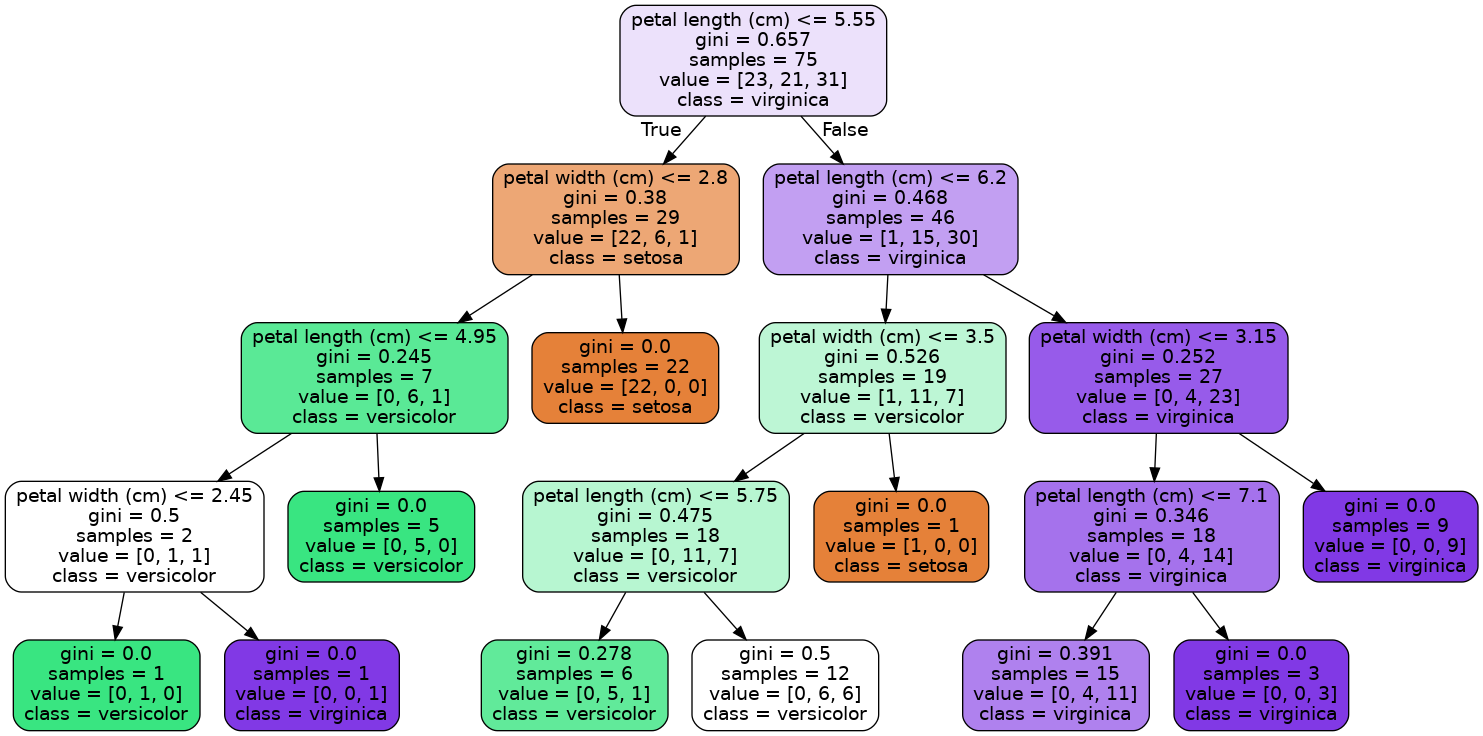

In [128]:
# we rerun the DecisionTreeClassifier with the best depth, and we visualize it.
tree_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=0)
tree_clf.fit(X_train, y_train)

export_graphviz(
        tree_clf,
        max_depth=best_depth,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', './iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=96'])
Image(filename = 'iris_tree.png')

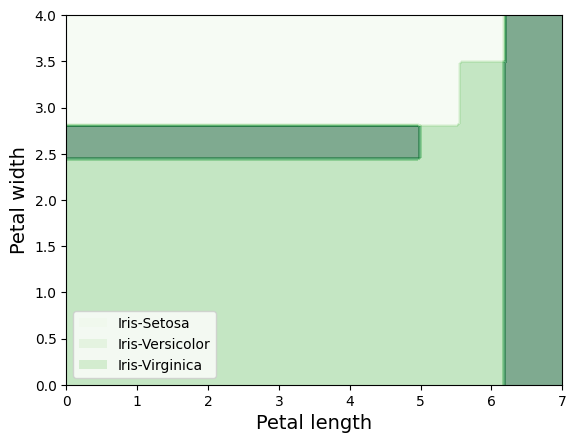

In [134]:
# We plot the decision boundaries
def plot_decision_boundary(clf, axes=[0, 7, 0, 4]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]

    y_pred = clf.predict(X_new).reshape(x1.shape)

    cs = plt.contourf(x1, x2, y_pred, alpha=0.5, cmap='Greens')

    proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in cs.collections]

    plt.legend(proxy, ["Iris-Setosa", "Iris-Versicolor", "Iris-Virginica"], loc='lower left')
    plt.axis('tight')
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)

plt.figure()
plot_decision_boundary(tree_clf)


## Part B
***
<font size="4.5">**Question 1**</font>
***